# **The Table Below Shows a Summary of (25) Comparables to 98 Arlington Ave, Clifton, NJ 07011.**

## Data was pulled through Zillow API

###### *Similar analysis can be done with any other house, just need Street Address and ZipCode

In [1]:
import json
import requests
import zillow
from pyzillow.pyzillow import ZillowWrapper, GetDeepSearchResults, GetUpdatedPropertyDetails
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
api_token = 'X1-ZWz1gzfnkqufpn_6h6e1'
api = zillow.ValuationApi()

In [3]:
address = "132 Warren Ave"
postal_code = "07204"

#address = "98 Arlington Ave"
#postal_code = "07011"

data = api.GetSearchResults(api_token, address, postal_code)
principal = data.get_dict().get('zpid')

In [4]:
count=25

data = api.GetDeepComps(api_token, principal, count)
streets = []
zipcodes = []
zillow_ids = []

print(data['comps'][0].get_dict())

[streets.append(data['comps'][i].get_dict().get('full_address').get('street')) for i in range(count)]
[zipcodes.append(data['comps'][i].get_dict().get('full_address').get('zipcode')) for i in range(count)]
[zillow_ids.append(data['comps'][i].get_dict().get('zpid')) for i in range(count)]

comps = dict(zip(streets,zipcodes))
comps, zillow_ids

{'zpid': '40050581', 'similarity_score': '4.0', 'links': {'home_details': 'https://www.zillow.com/homedetails/32-Charles-St-Roselle-Park-NJ-07204/40050581_zpid/', 'graphs_and_data': 'http://www.zillow.com/homedetails/32-Charles-St-Roselle-Park-NJ-07204/40050581_zpid/#charts-and-data', 'map_this_home': 'http://www.zillow.com/homes/40050581_zpid/', 'comparables': 'http://www.zillow.com/homes/comps/40050581_zpid/'}, 'full_address': {'street': '32 Charles St', 'zipcode': '07204', 'city': 'Roselle Park', 'state': 'NJ', 'latitude': '40.663184', 'longitude': '-74.262854'}, 'zestimate': {'amount': 338428, 'amount_currency': 'USD', 'amount_last_updated': '04/03/2019', 'amount_change_30days': 2990, 'valuation_range_low': 318122, 'valuation_range_high': 355349}, 'local_realestate': {'region_name': 'Roselle Park', 'region_id': '29512', 'region_type': 'city', 'overview_link': 'http://www.zillow.com/local-info/NJ-Roselle-Park/r_29512/', 'fsbo_link': 'http://www.zillow.com/roselle-park-nj/fsbo/', 'sa

({'121 Sterling Pl': '07203',
  '126 Warren Ave': '07204',
  '127 Butler Ave': '07204',
  '132 W 4th Ave': '07203',
  '134 Butler Ave': '07204',
  '139 Warren Ave': '07204',
  '149 W 1st Ave': '07203',
  '15 Charles St': '07204',
  '174 W Colfax Ave': '07204',
  '200 Vine St': '07203',
  '218 W 3rd Ave': '07203',
  '219 Locust St': '07203',
  '246 W 3rd Ave': '07203',
  '259 W 4th Ave': '07203',
  '26 E Lincoln Ave': '07204',
  '271 Seaton Ave': '07204',
  '32 Charles St': '07204',
  '332 W 3rd Ave': '07203',
  '344 W 5th Ave': '07203',
  '359 W 4th Ave': '07203',
  '36 Charles St': '07204',
  '366 W 3rd Ave': '07203',
  '423 Chester Ave': '07204',
  '43 E Westfield Ave': '07204',
  '60 W Grant Ave': '07204'},
 ['40050581',
  '40050355',
  '40050039',
  '40049632',
  '40049542',
  '40049538',
  '40049242',
  '40049694',
  '40046432',
  '40046536',
  '40046509',
  '40046401',
  '40046386',
  '40046195',
  '40046154',
  '40046146',
  '40046111',
  '40045611',
  '40045582',
  '40045628',


In [5]:
zillow_data = ZillowWrapper(api_token)

## Use GetDeepSearchResults

In [6]:
index = ['zillow_id',
            'home_type',
            'home_detail_link',
            'graph_data_link',
            'map_this_home_link',
            'latitude',
            'longitude',
            'tax_year',
            'tax_value',
            'year_built',
            'property_size',
            'home_size',
            'bathrooms',
            'bedrooms',
            'last_sold_date',
            'last_sold_price_currency',
            'last_sold_price',
            'zestimate_amount',
            'zestimate_last_updated',
            'zestimate_value_change',
            'zestimate_valuation_range_high',
            'zestimate_valuationRange_low',
            'zestimate_percentile']
col_names =  ['A']
df = pd.DataFrame(index = index, columns = col_names) #creates a new dataframe that's empty

for k,v in comps.items():
    deep_search_response = zillow_data.get_deep_search_results(k, v) 
    result = GetDeepSearchResults(deep_search_response)
    stats = {'zillow_id': result.zillow_id,
                    'home_type': result.home_type,
                    'home_detail_link': result.home_detail_link,
                    'graph_data_link': result.graph_data_link,
                    'map_this_home_link': result.map_this_home_link,
                    'latitude': result.latitude,
                    'longitude': result.longitude,
                    #'coordinates (as GEOS point)': result.coordinates,
                    'tax_year': result.tax_year,
                    'tax_value': result.tax_value,
                    'year_built': result.year_built,
                    'property_size': result.property_size,
                    'home_size': result.home_size,
                    'bathrooms': result.bathrooms,
                    'bedrooms': result.bedrooms,
                    'last_sold_date': result.last_sold_date,
                    'last_sold_price_currency': result.last_sold_price_currency,
                    'last_sold_price': result.last_sold_price,
                    'zestimate_amount': result.zestimate_amount,
                    'zestimate_last_updated': result.zestimate_last_updated,
                    'zestimate_value_change': result.zestimate_value_change,
                    'zestimate_valuation_range_high': result.zestimate_valuation_range_high,
                    'zestimate_valuationRange_low': result.zestimate_valuationRange_low,
                    'zestimate_percentile': result.zestimate_percentile
                 }
    
    df[k] = pd.Series(stats)
        
#[print(k,v) for k,v in stats.items()]
df = df.drop('A', axis=1).T
df.head(10)
#df.columns.tolist()

,zillow_id,home_type,home_detail_link,graph_data_link,map_this_home_link,latitude,longitude,tax_year,tax_value,year_built,...,bedrooms,last_sold_date,last_sold_price_currency,last_sold_price,zestimate_amount,zestimate_last_updated,zestimate_value_change,zestimate_valuation_range_high,zestimate_valuationRange_low,zestimate_percentile
32 Charles St,40050581,SingleFamily,https://www.zillow.com/homedetails/32-Charles-...,http://www.zillow.com/homedetails/32-Charles-S...,http://www.zillow.com/homes/40050581_zpid/,40.663184,-74.262854,2018,185800.0,1930,...,4,08/28/2018,USD,340000,338428,04/03/2019,2990,355349,318122,0
15 Charles St,40050355,SingleFamily,https://www.zillow.com/homedetails/15-Charles-...,http://www.zillow.com/homedetails/15-Charles-S...,http://www.zillow.com/homes/40050355_zpid/,40.663555,-74.263523,2018,255800.0,1900,...,5,06/06/2018,USD,310000,387733,04/03/2019,4335,407120,368346,0
26 E Lincoln Ave,40050039,SingleFamily,https://www.zillow.com/homedetails/26-E-Lincol...,http://www.zillow.com/homedetails/26-E-Lincoln...,http://www.zillow.com/homes/40050039_zpid/,40.667629,-74.264262,2018,205200.0,1900,...,None,05/08/2018,USD,215000,299954,04/03/2019,7698,314952,284956,0
139 Warren Ave,40049632,SingleFamily,https://www.zillow.com/homedetails/139-Warren-...,http://www.zillow.com/homedetails/139-Warren-A...,http://www.zillow.com/homes/40049632_zpid/,40.662345,-74.269163,2018,222500.0,1950,...,3,05/24/2018,USD,160000,237908,04/03/2019,-1288,259320,216496,0
423 Chester Ave,40049542,SingleFamily,https://www.zillow.com/homedetails/423-Chester...,http://www.zillow.com/homedetails/423-Chester-...,http://www.zillow.com/homes/40049542_zpid/,40.664218,-74.274363,2018,293800.0,1954,...,3,10/15/2018,USD,305000,311843,04/03/2019,3271,327435,296251,0
271 Seaton Ave,40049538,SingleFamily,https://www.zillow.com/homedetails/271-Seaton-...,http://www.zillow.com/homedetails/271-Seaton-A...,http://www.zillow.com/homes/40049538_zpid/,40.663549,-74.274027,2018,324500.0,1954,...,3,05/15/2018,USD,293900,306704,04/03/2019,3101,322039,291369,0
174 W Colfax Ave,40049242,SingleFamily,https://www.zillow.com/homedetails/174-W-Colfa...,http://www.zillow.com/homedetails/174-W-Colfax...,http://www.zillow.com/homes/40049242_zpid/,40.66795,-74.272474,2018,209300.0,1950,...,3,04/06/2018,USD,220000,267248,04/03/2019,11014,280610,245868,0
126 Warren Ave,40049694,SingleFamily,https://www.zillow.com/homedetails/126-Warren-...,http://www.zillow.com/homedetails/126-Warren-A...,http://www.zillow.com/homes/40049694_zpid/,40.661881,-74.268678,2018,205900.0,1930,...,3,10/15/2018,USD,197500,236219,04/03/2019,5530,250392,207873,0
332 W 3rd Ave,40046432,SingleFamily,https://www.zillow.com/homedetails/332-W-3rd-A...,http://www.zillow.com/homedetails/332-W-3rd-Av...,http://www.zillow.com/homes/40046432_zpid/,40.656874,-74.270887,2018,154400.0,1910,...,4,02/13/2019,USD,290000,293485,04/03/2019,-2935,308159,278811,0
344 W 5th Ave,40046536,SingleFamily,https://www.zillow.com/homedetails/344-W-5th-A...,http://www.zillow.com/homedetails/344-W-5th-Av...,http://www.zillow.com/homes/40046536_zpid/,40.654407,-74.270424,2018,99500.0,1915,...,4,05/21/2018,USD,295000,292605,04/03/2019,1621,307235,275049,0


In [7]:
df.reset_index(inplace=True)

In [8]:
df.dtypes

index                             object
zillow_id                         object
home_type                         object
home_detail_link                  object
graph_data_link                   object
map_this_home_link                object
latitude                          object
longitude                         object
tax_year                          object
tax_value                         object
year_built                        object
property_size                     object
home_size                         object
bathrooms                         object
bedrooms                          object
last_sold_date                    object
last_sold_price_currency          object
last_sold_price                   object
zestimate_amount                  object
zestimate_last_updated            object
zestimate_value_change            object
zestimate_valuation_range_high    object
zestimate_valuationRange_low      object
zestimate_percentile              object
dtype: object

In [9]:
df['last_sold_date'] = pd.to_datetime(df['last_sold_date'])
df['Year Last Sold'] = df['last_sold_date'].dt.year

In [10]:
df['last_sold_price'] = df['last_sold_price'].astype(float)
df['zestimate_amount'] = df['zestimate_amount'].astype(float).apply(lambda x: round(x, 2))

In [11]:
cols = ['last_sold_price','zestimate_amount','Year Last Sold','home_size','bedrooms','bathrooms',
       'year_built']
pivot_cols = ['Year Last Sold', 'home_size','year_built','bedrooms','bathrooms']

new_df = df[cols].groupby(pivot_cols).mean()
new_df.head(10)

last_sold_price  \
Year Last Sold home_size year_built bedrooms bathrooms                    
2018           1120      1952       3        1.0               206000.0   
               1206      1932       3        1.0               245000.0   
               1392      1920       4        2.0               265000.0   
               1404      1923       4        2.0               240000.0   
               1420      1954       3        2.0               293900.0   
               1433      1920       3        2.0               295610.0   
               1456      1938       4        2.0               319900.0   
               1474      1910       4        2.0               160000.0   
               1516      1950       3        1.0               160000.0   
               1544      1912       3        1.0               165000.0   

                                                        zestimate_amount  
Year Last Sold home_size year_built bedrooms bathrooms                    
2018           1120      1952       3        1.0                215010.0  
               1206      1932       3        1.0                245174.0  
               1392      1920       4        2.0                276185.0  
               1404      1923       4        2.0                249453.0  
               1420      1954       3        2.0                306704.0  
               1433      1920       3        2.0                307664.0  
               1456      1938       4        2.0                307171.0  
               1474      1910       4        2.0                263185.0  
               1516      1950       3        1.0                237908.0  
               1544      1912       3        1.0                180443.0

In [12]:
df['Bed-Bath'] = df['bedrooms'] + '-' + df['bathrooms']

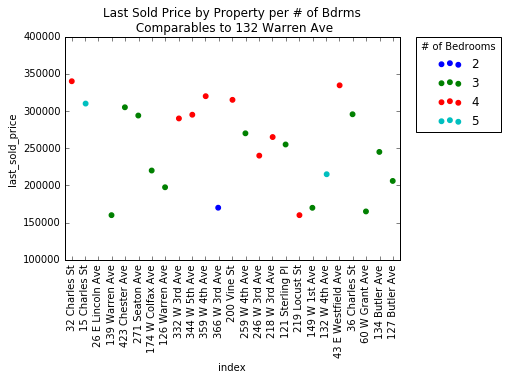

In [17]:
sns.pointplot('index','last_sold_price',data=df, 
              hue='bedrooms', dodge=True, join=False, 
              hue_order=['2','3','4','5']
             )
plt.xticks(rotation=90)
plt.title("Last Sold Price by Property per # of Bdrms" + "\n Comparables to " + address)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,title="# of Bedrooms")


## Use GetUpdatedProperty Details

In [32]:
updated_property_details_response = zillow_data.get_updated_property_details('40050039')
result = GetUpdatedPropertyDetails(updated_property_details_response) 

stats = {'zillow_id': result.zillow_id,
            'home_type': result.home_type,
            'home_detail_link': result.home_detail_link,
            'photo_gallery': result.photo_gallery,
            'latitude': result.latitude,
            'longitude': result.longitude,
            'year_built': result.year_built,
            'property_size': result.property_size,
            'home_size': result.home_size,
            'bathrooms': result.bathrooms,
            'bedrooms': result.bedrooms,
            'home_info': result.home_info,
            'year_updated': result.year_updated,
            'floor_material': result.floor_material,
            'num_floors': result.num_floors,
            'basement': result.basement,
            'roof': result.roof,
            'view': result.view,
            'parking_type': result.parking_type,
            'heating_sources': result.heating_sources,
            'heating_system': result.heating_system,
            'rooms': result.rooms,
            'home_description': result.home_description,
            'neighborhood': result.neighborhood,
            'school_district': result.school_district
                 }
stats

TypeError: __str__ returned non-string (type dict)

In [34]:
zillow_data = ZillowWrapper(api_token)

index = ['zillow_id'
        'home_type'
        'home_detail_link'
        'photo_gallery'
        'latitude'
        'latitude'
        'year_built'
        'property_size'
        'home_size'
        'bathrooms'
        'bedrooms'
        'home_info'
        'year_updated'
        'floor_material'
        'num_floors'
        'basement'
        'roof'
        'view'
        'parking_type'
        'heating_sources'
        'heating_system'
        'rooms'
        'home_description'
        'neighborhood'
        'school_district']
col_names =  ['A']
df1 = pd.DataFrame(index = index, columns = col_names) #creates a new dataframe that's empty

for z in zillow_ids:
    try:
        print(z)
        updated_property_details_response = zillow_data.get_updated_property_details(z)
        result = GetUpdatedPropertyDetails(updated_property_details_response) 
        stats = {'zillow_id': result.zillow_id,
                'home_type': result.home_type,
                'home_detail_link': result.home_detail_link,
                'photo_gallery': result.photo_gallery,
                'latitude': result.latitude,
                'longitude': result.longitude,
                'year_built': result.year_built,
                'property_size': result.property_size,
                'home_size': result.home_size,
                'bathrooms': result.bathrooms,
                'bedrooms': result.bedrooms,
                'home_info': result.home_info,
                'year_updated': result.year_updated,
                'floor_material': result.floor_material,
                'num_floors': result.num_floors,
                'basement': result.basement,
                'roof': result.roof,
                'view': result.view,
                'parking_type': result.parking_type,
                'heating_sources': result.heating_sources,
                'heating_system': result.heating_system,
                'rooms': result.rooms,
                'home_description': result.home_description,
                'neighborhood': result.neighborhood,
                'school_district': result.school_district
                     }

        df1[z] = pd.Series(stats)
    except:
        pass
        
#[print(k,v) for k,v in stats.items()]
#df1 = df1.drop('A', axis=1).T
df1.head(10)
#df.columns.tolist()

40050581
40050355
40050039
40049632
40049542
40049538
40049242
40049694
40046432
40046536
40046509
40046401
40046386
40046195
40046154
40046146
40046111
40045611
40045582
40045628
40050599
40050582
40049645
40049606
40049586


,A,40050581,40050355,40049632,40049542,40049538,40049242,40049694,40046432,40046536,...,40046146,40046111,40045611,40045582,40045628,40050599,40050582,40049645,40049606,40049586
zillow_idhome_typehome_detail_linkphoto_gallerylatitudelatitudeyear_builtproperty_sizehome_sizebathroomsbedroomshome_infoyear_updatedfloor_materialnum_floorsbasementroofviewparking_typeheating_sourcesheating_systemroomshome_descriptionneighborhoodschool_district,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
